Generated 100 EODB series

Sample of the data:
       eodb_0      eodb_1     eodb_2     eodb_3     eodb_4     eodb_5  \
0  101.093428  102.898711  98.749643  96.284385  98.373013  99.252481   
1  100.914969  104.904482  98.562970  94.723836  98.409994  98.451684   
2  102.323114  105.134496  97.099468  94.034994  98.543865  95.014453   
3  105.542260  103.879323  96.598509  97.679203  99.573905  94.482201   
4  105.153541  105.433822  93.036700  98.864156  96.951411  95.961469   

      eodb_6      eodb_7      eodb_8      eodb_9  ...     eodb_90     eodb_91  \
0  97.871837  101.670370  100.033949  101.630804  ...  102.021789   98.348437   
1  96.734702   98.157291   99.126341  103.914271  ...  101.368922   99.301764   
2  95.008838   99.658598   98.883729  105.054605  ...  100.295261   99.015889   
3  94.062558   99.292404  100.396120  101.078293  ...  102.267692  100.668085   
4  93.753750  100.796600  103.062353  100.865175  ...   96.782994   98.149437   

      eodb_92     eodb_93  

<Figure size 1200x600 with 0 Axes>

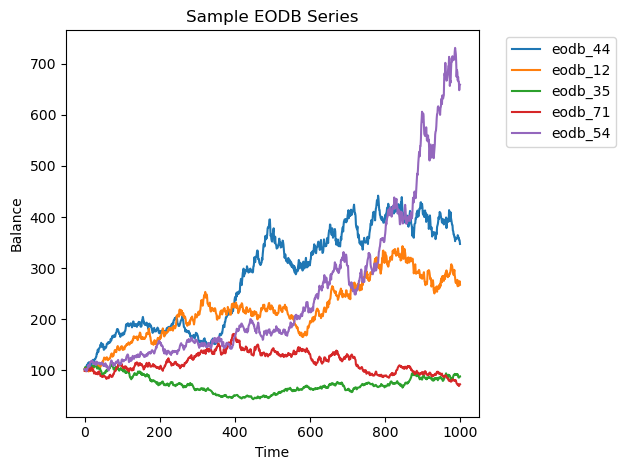

In [1]:
# Import cell
import numpy as np
import pandas as pd
from pathlib import Path
from typing import List
import random

# Configuration cell
INPUT_CONFIG = {
    'n_series': 100,
    'output_path': Path('data/eodb'),
    'output_filename': 'eodb_series.pkl',
    'series_length': 1000,  # Length of each EODB series
    'random_seed': 42
}

# EODB Generation Functions cell
def generate_single_eodb(length: int) -> np.ndarray:
    """Generate a single EODB time series with specified length"""
    # Initial balance
    balance = 100.0
    series = np.zeros(length)
    
    # Random walk with drift and volatility
    drift = 0.001
    volatility = 0.02
    
    for i in range(length):
        change = np.random.normal(drift, volatility)
        balance *= (1 + change)
        series[i] = balance
        
    return series

def generate_multiple_eodb(n_series: int, length: int) -> pd.DataFrame:
    """Generate multiple EODB series efficiently"""
    # Create empty DataFrame
    series_data = {}
    
    # Generate all series
    for i in range(n_series):
        series_data[f'eodb_{i}'] = generate_single_eodb(length)
    
    # Convert to DataFrame
    return pd.DataFrame(series_data)

# Execution cell
np.random.seed(INPUT_CONFIG['random_seed'])
INPUT_CONFIG['output_path'].mkdir(exist_ok=True, parents=True)

# Generate all series at once
eodb_df = generate_multiple_eodb(
    INPUT_CONFIG['n_series'], 
    INPUT_CONFIG['series_length']
)

# Save to single file
output_file = INPUT_CONFIG['output_path'] / INPUT_CONFIG['output_filename']
eodb_df.to_pickle(output_file)

# Display sample of the data
print(f"Generated {INPUT_CONFIG['n_series']} EODB series")
print("\nSample of the data:")
print(eodb_df.head())

# Optional: Plot a few random series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
random_columns = random.sample(eodb_df.columns.tolist(), 5)
eodb_df[random_columns].plot()
plt.title('Sample EODB Series')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
